In [1]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\advertising.csv')

This dataset contains details of persons.Our objective is to predict,who is more likely to click the ad.

In [23]:
head(df)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# EDA

In [ ]:
install.packages('Amelia')

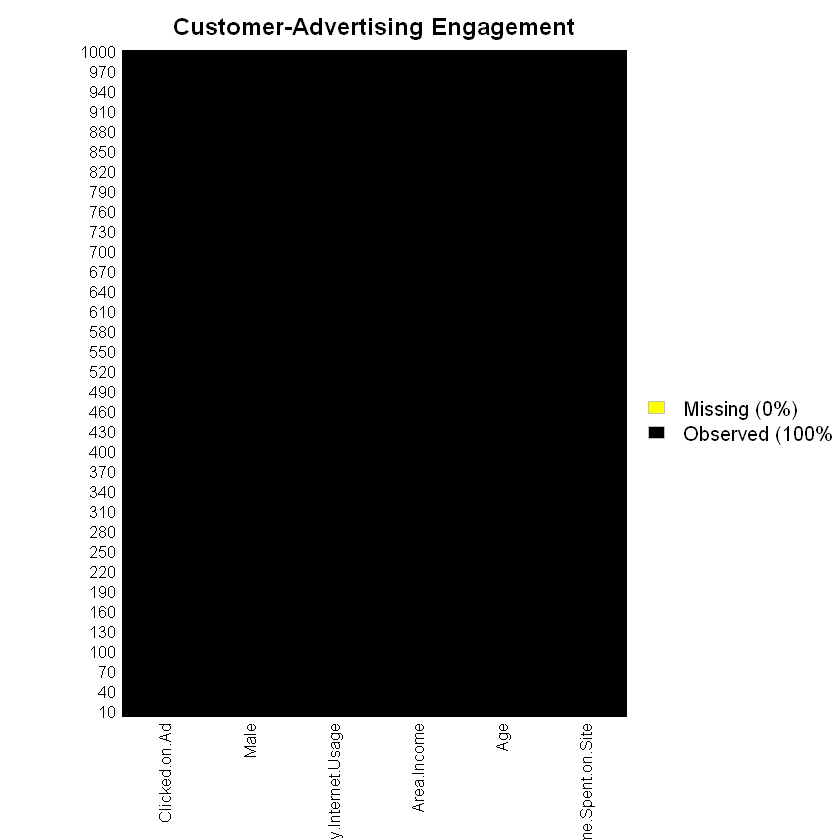

In [68]:
library('Amelia')
missmap(df,main="Customer-Advertising Engagement",col=c("yellow","black"),legend=TRUE)

There is no missing values in the dataset

# Building a Logistic Regression Model

In [2]:
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [3]:
library(dplyr)
df=select(df,-Ad.Topic.Line,-City,-Timestamp,-Country)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Removing Identity Variables

In [4]:
str(df)

'data.frame':	1000 obs. of  6 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [5]:
library(caTools)
set.seed(101)

split=sample.split(df$Clicked.on.Ad, SplitRatio=0.70)

final.train=subset(df,split==TRUE)
final.test=subset(df,split==FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

# Training the Model

In [6]:
final.log.model=glm(formula=Clicked.on.Ad~.,family=binomial(link='logit'),data=final.train)
summary(final.log.model)


Call:
glm(formula = Clicked.on.Ad ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.45597  -0.16314  -0.04196   0.02200   3.04048  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               2.491e+01  2.909e+00   8.563  < 2e-16 ***
Daily.Time.Spent.on.Site -1.868e-01  2.292e-02  -8.151 3.60e-16 ***
Age                       1.785e-01  3.193e-02   5.591 2.25e-08 ***
Area.Income              -1.328e-04  2.181e-05  -6.089 1.13e-09 ***
Daily.Internet.Usage     -5.526e-02  6.995e-03  -7.900 2.79e-15 ***
Male                     -2.389e-01  4.563e-01  -0.523    0.601    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 970.41  on 699  degrees of freedom
Residual deviance: 143.41  on 694  degrees of freedom
AIC: 155.41

Number of Fisher Scoring iterations: 8

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage has high significance level

In [7]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

In [8]:
fitted.results=ifelse(fitted.probabilities > 0.5,1,0)

In [9]:
misClasificError=mean(fitted.results!=final.test$Clicked.on.Ad)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.976666666666667"


In [17]:
table(final.test$Clicked.on.Ad,fitted.probabilities>0.5)

   
    FALSE TRUE
  0   148    2
  1     5  145

148-Ignored the Ad predicted correctly(TN)
2-Ignored the Ad  predicted Incorrectly(FP)
5-Clicked on Ad predicted Incorrectly(FN)
145-Clicked on Ad predicted correctly(TP)

In [19]:
TN=148
FP=2
FN=5
TP=145

In [21]:
ERR=(FP+FN)/(TN+FP+FN+TP)
ERR

[1] 0.02333333

ERR (Error Rate) is the percentage of wrong predictions of our model.
Our model has an ERR of 0.023 stating that 2.3 % wrong predictions have been done by the model.

In [22]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 0.9766667

ACC (Accuracy) is the percentage of correct predictions of our model.
Our model has an ACC of 0.97 stating that 97 % correct predictions have been made by the
model.

In [24]:
SN = TP/(TP + FN)
SN

[1] 0.9666667

SN (Sensitivity) is the number of correct positive predictions divided by the total number of
positives.
Our model has an SN of 0.96 stating that 96 % correct positive predictions were made out
of the total positives.


In [26]:
SP = TN/(TN + FP)
SP

[1] 0.9866667

SP (Specificity) is the number of correct negative predictions divided by the total number of
negatives.
Our model has an SP of 0.98 stating that 98 % correct negative predictions were made out of the
total negatives.

In [28]:
PREC = TP/(TP + FP)
PREC

[1] 0.9863946

PREC (Precision) is the number of correct positive predictions divided by the total number of
positive predictions.
Our model has a PREC of 0.98 stating that 98 % of the predictions regarding the positive predicted
values are correct.


In [30]:
FPR = FP/(TN + FP)
FPR

[1] 0.01333333

FPR (False Positive Rate) is the number of incorrect positive predictions divided by the total
number of negatives.
Our model has a FPR of 0.013 stating that 1.3 % of the predictions regarding the positive predicted
values are incorrect.

In [61]:
install.packages("pROC")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\Rtmp46jh24\downloaded_packages


In [13]:
library("pROC")

Warning message:
"package 'pROC' was built under R version 3.6.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [11]:
test_prob=predict(final.log.model,newdata=final.test,type="response")

Setting levels: control = 0, case = 1
Setting direction: controls < cases


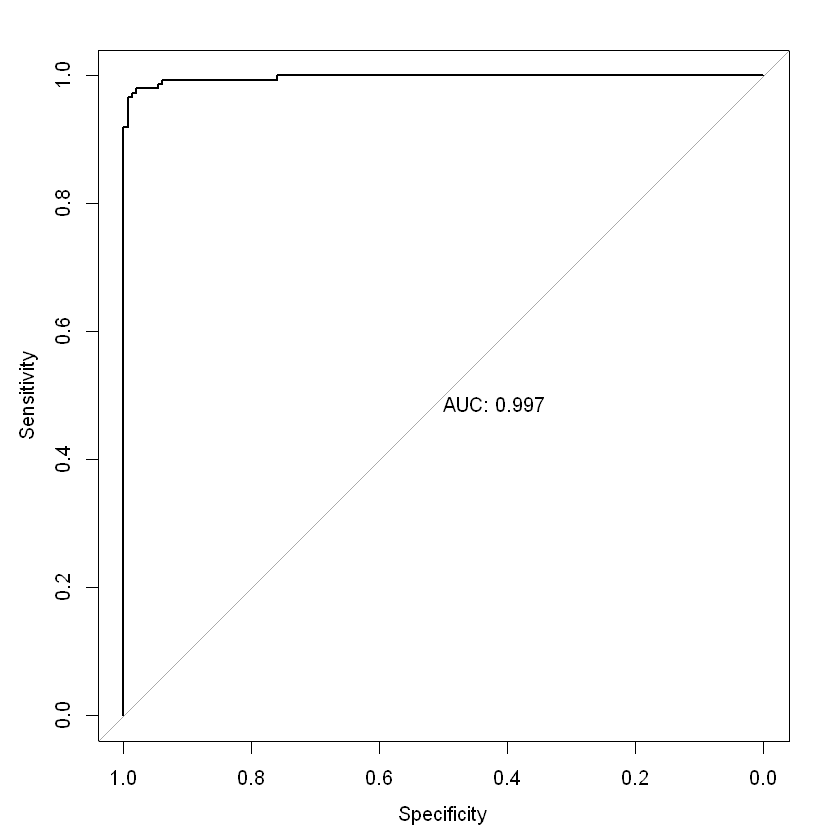

In [14]:
test_roc=roc(final.test$Clicked.on.Ad~test_prob,plot=TRUE,print.auc=TRUE)

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

 By analogy, Higher the AUC, better the model is at distinguishing between persons who clicked on Advertisement OR not.